In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("../data/misgrosi_job.csv")
df_density = pd.read_excel('../../density.xlsx')

In [27]:
df.head()
df.dtypes

Position    object
Company     object
Location    object
Job Type    object
dtype: object

In [30]:
def post(row):
    try:
        post_stadt = row['Location'].split()
        if post_stadt[0].isdigit():
            val = int(post_stadt[0])
        else:
            val = None
    except:
        val = str(row['Location'])
    
    return val
        
df['Post Code'] = df.apply(post, axis=1)

In [31]:
def stadt(row):
    try:
        post_stadt = row['Location'].split()

        if len(post_stadt) == 2 :
            val = post_stadt[1]
        elif not post_stadt[0].isdigit():
            val = post_stadt[0]
        else:
            val = None
    except:
        val = None
    return val
        
df['Stadt'] = df.apply(stadt, axis=1)
df.head()

,Position,Company,Location,Job Type,Post Code,Stadt
0,"Wir suchen ein zusätzliches Grosi, das uns vor...",Daniela1984,3114 Wichtra,Kinderbetreuung allgemein,3114.0,Wichtra
1,Suchen liebevolles Grosi für langfristige Betr...,Hendrik,3037 Herrenschwanden,Tages-Grosi,3037.0,Herrenschwanden
2,Liebe Betreuung gesucht in Rorbas\nFamiliebuehrer,Familiebuehrer,8427 Rorbas,Grosi & Opi,8427.0,Rorbas
3,Grosi gesucht im Entlebuch\nMamimitHerz,MamimitHerz,6162 Entlebu,Grosi als Nanny/Haushaltshilfe,6162.0,Entlebu
4,Grosi gesucht für Kinderbetreuung in La Neuvev...,Sina 88,2520 La Neuvevill,Babysitting,2520.0,None


In [11]:
# Data group by post code
df_count = df.groupby(['Post Code']).size().reset_index(name = 'Counts')
df_count

,Post Code,Counts
0,1794.0,1
1,2000.0,2
2,2502.0,2
3,2503.0,2
4,2504.0,1
...,...,...
573,9642.0,1
574,60005.0,1
575,75059.0,1
576,79541.0,1


In [32]:
# Merge grouped aby data with density.csv
df = df_count.merge(df_density,on = 'Post Code',how = 'left')
df['gig_per'] = 100*df['Counts']/df['Population']
# Define urban column
df['urban'] = 'unknown'
df.loc[df['Density']<400, 'urban'] = 'rural'
df.loc[(df['Density']>=400) & (df['Density']<1500), 'urban'] = 'urban'
df.loc[df['Density']>1500, 'urban'] = 'urban center'
df.head()

,Post Code,Counts,City,Region,Population,Area,Density,gig_per,urban
0,1794.0,1,NaN,Canton of Fribourg,575.0,3.795,151.515152,0.173913,rural
1,2000.0,2,Neuchâtel,Canton of Neuchâtel,32376.0,31.600,1024.556962,0.006177,urban
2,2502.0,2,NaN,Canton of Bern,16911.0,6.400,2642.343750,0.011827,urban center
3,2503.0,2,NaN,Canton of Bern,14239.0,2.954,4820.243737,0.014046,urban center
4,2504.0,1,NaN,Canton of Bern,23332.0,9.700,2405.360825,0.004286,urban center


In [33]:
# Count job number of urban center, urban and rural 
urban_count = df.groupby('urban')['urban'].count()
urban_count

urban
rural           216
unknown          18
urban           238
urban center    114
Name: urban, dtype: int64

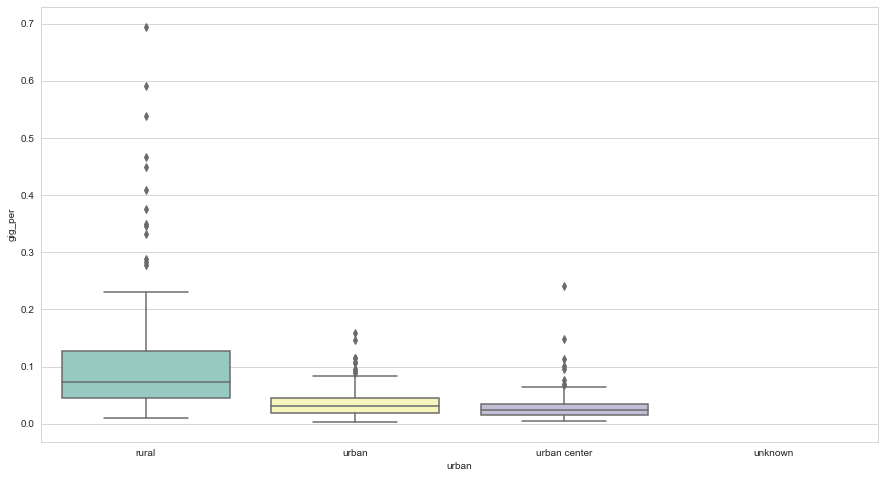

In [34]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="urban", y="gig_per",               
data=df, palette="Set3")

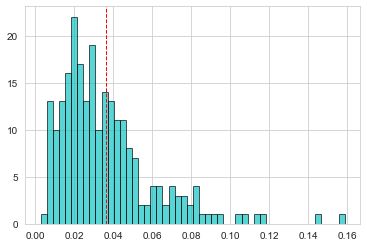

In [35]:
urban = df[df["urban"]=='urban']['gig_per']
urban_center = df[df["urban"]=='urban center']['gig_per']
rural = df[df["urban"]=='rural']['gig_per']
plt.hist(urban, color = 'c', edgecolor='black',alpha=0.65,bins = 50)
plt.axvline(urban.mean(), color='r', linestyle='dashed', linewidth=1)

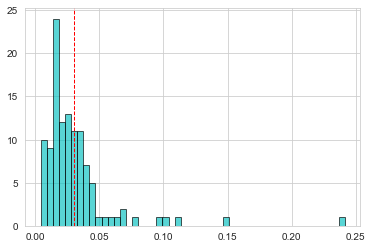

In [36]:
plt.hist(urban_center, color = 'c', edgecolor='black',alpha=0.65,bins = 50)
plt.axvline(urban_center.mean(), color='r', linestyle='dashed', linewidth=1)

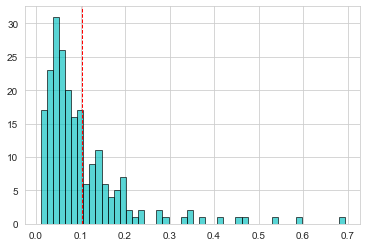

In [37]:
plt.hist(rural, color = 'c', edgecolor='black',alpha=0.65,bins = 50)
plt.axvline(rural.mean(), color='r', linestyle='dashed', linewidth=1)